# 10 Feature Engineering 

## 5- Uygulama

### 1- Feature Engineering & Data Preprocessing Uygulama

##### Titanik veri setini kullanarak gördüğümüz tüm konuları kapsayacak şekilde ele alıyor olacağız

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
!pip install missingno
import missingno as msno
from datetime import date
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import LocalOutlierFactor #çok değişkenli ayıklama yöntemi bunkarı gptye sor
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler #standartlaştırma ve dönüştürme fonksiyonları


Defaulting to user installation because normal site-packages is not writeable


In [2]:
df = pd.read_csv("titanic.csv")

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.shape #veri setimde 891 gözlem birimi ve 12 değişken bulunmaktadır.
#ve titanic yolcularının hayatta kalıp kalmama odağında yolcuların idleri, 
#yolcuların yolculuk sınıfları, cinsiyet, isim ,yaş, akrabalık ilişkileri, ticket, fare, cabin
# embarked gibi değişkenleri bulunmaktadır. bu problemde ana hedef insanların hayatta kalıp alamayacağını modelleyebilmektir.

(891, 12)

##### değişken üretme ve veri önişleme bölümlerinin hepsini birlikte toparlamış olacağız

In [4]:
# değişken isimlelrinin büyük küçük harflerden oluşuyor olmasını değiştireceğim.
#hepsini büyük harf yapacağım

df.columns = [col.upper() for col in df.columns] #df sütunlarında gez yakaladığın isimleri büyük harf yap

In [5]:
df.head()

,PASSENGERID,SURVIVED,PCLASS,NAME,SEX,AGE,SIBSP,PARCH,TICKET,FARE,CABIN,EMBARKED
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


##### birinci adımım artık değişken mühendisliği
#### 1.Feature Engineering (değişken mühendisliği)

teroik bölümlerde bu alanların ilişkili olduğunu ifade etmiştik bazen yeni ürettiğimiz değişkenleri daha sonra ön işlemeden geçirmemiz gerekebilir, bazen önce önişleme yapıp sonra yeni değişken türetmeniz gerekebilir dolayısıyla bu yarımın farkında olarak 1. adımımız değişken mühendisliği. 

In [6]:
#cabin bool
df["NWE_CABIN_BOOL"] = df["CABIN"].notnull().astype("int")

#name count
df["NEW_NAME_COUNT"] = df["NAME"].str.len()

# name word count
df["NEW_NAME_WORD_COUNT"] = df["NAME"].apply(lambda x: len(str(x).split(" ")))

#name dr
df["NEW_NAME_DR"] = df["NAME"].apply(lambda x: len([x for x in x.split() if x.startswith("Dr")]))

#name title
df["NEW_TITLE"] = df.NAME.str.extract(" ([A-Za-z]+)\.", expand = False)

#family size
df["NEW_FAMILY_SIZE"] = df["SIBSP"] + df["PARCH"] + 1

#age_pclass
df["NEW_AGE_PCLASS"] = df["AGE"] * df["PCLASS"]

#is alone
df.loc[((df["SIBSP"] + df["PARCH"]) > 0), "NEW_IS_ALONE"] = "NO"
df.loc[((df["SIBSP"] + df["PARCH"]) == 0), "NEW_IS_ALONE"] = "YES"

#age level(BU YENİ)
df.loc[(df["AGE"] < 18), "NEW_AGE_CAT"] = "young"
df.loc[(df["AGE"] >=18) & (df["AGE"] < 56), "NEW_AGE_CAT"] = "mature"
df.loc[(df["AGE"] >= 56), "NEW_AGE_CAT"] = "senior"

# sex x age
df.loc[(df["SEX"] == "male") & (df["AGE"] <= 21), "NEW_SEX_CAT"] = "youngmale"
df.loc[(df["SEX"] == "male") & ((df["AGE"] > 21) & (df["AGE"]) <= 50), "NEW_SEX_CAT"] = "maturemale"
df.loc[(df["SEX"] == "male") & (df["AGE"] > 50), "NEW_SEX_CAT"] = "seniormale"
df.loc[(df["SEX"] == "female") & (df["AGE"] <= 21), "NEW_SEX_CAT"] = "youngfemale"
df.loc[(df["SEX"] == "female") & ((df["AGE"] > 21) & (df["AGE"]) <= 50), "NEW_SEX_CAT"] = "maturefemale"
df.loc[(df["SEX"] == "female") & (df["AGE"] > 50), "NEW_SEX_CAT"] = "seniorfemale"


In [7]:
df.head()

,PASSENGERID,SURVIVED,PCLASS,NAME,SEX,AGE,SIBSP,PARCH,TICKET,FARE,...,NWE_CABIN_BOOL,NEW_NAME_COUNT,NEW_NAME_WORD_COUNT,NEW_NAME_DR,NEW_TITLE,NEW_FAMILY_SIZE,NEW_AGE_PCLASS,NEW_IS_ALONE,NEW_AGE_CAT,NEW_SEX_CAT
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,0,23,4,0,Mr,2,66.0,NO,mature,maturemale
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,1,51,7,0,Mrs,2,38.0,NO,mature,maturefemale
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,0,22,3,0,Miss,1,78.0,YES,mature,maturefemale
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,1,44,7,0,Mrs,2,35.0,NO,mature,maturefemale
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,0,24,4,0,Mr,1,105.0,YES,mature,maturemale


In [8]:
df.shape #artık 22 değişkenim var

(891, 22)

In [9]:
#bazı ön işleme işlmeleri yapmak istiyorum bu saatten sonra ancak hangileri  sayısal hangileri kategorik bunu bilmiyorum
#bu yüzden grabcolname fonksiyonumu çağrıyorum.

In [10]:
def grab_col_names(dataframe, cat_th=10, car_th=20, print_results=True):



    cat_cols = [col for col in dataframe.columns if str(dataframe[col].dtypes) in ["category", "object", "bool"]]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and dataframe[col].dtypes in ["int64", "float64"]]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and str(dataframe[col].dtypes) in ["category", "object"]]
    cat_cols = [col for col in cat_cols if col not in cat_but_car]
    cat_cols = cat_cols + num_but_cat
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes in ["int64", "float64"]]
    num_cols = [col for col in num_cols if col not in cat_cols]

    if print_results:
        print(f'Observations {dataframe.shape[0]}')
        print(f'Variables:  {dataframe.shape[1]}')
        print(f'cat_cols:  {len(cat_cols)}')
        print(f'num_cols:  {len(num_cols)}')
        print(f'cat_but_car:  {len(cat_but_car)}')
        print(f'num_but_cat:  {len(num_but_cat)}')

    return cat_cols, num_cols, cat_but_car

cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations 891
Variables:  22
cat_cols:  13
num_cols:  5
cat_but_car:  3
num_but_cat:  7


In [11]:
cat_cols

['SEX',
 'EMBARKED',
 'NEW_TITLE',
 'NEW_IS_ALONE',
 'NEW_AGE_CAT',
 'NEW_SEX_CAT',
 'SURVIVED',
 'PCLASS',
 'SIBSP',
 'PARCH',
 'NEW_NAME_WORD_COUNT',
 'NEW_NAME_DR',
 'NEW_FAMILY_SIZE']

In [12]:
num_cols #PASSENGERID bir num değişken değil sileceğim list comperations ile

['PASSENGERID', 'AGE', 'FARE', 'NEW_NAME_COUNT', 'NEW_AGE_PCLASS']

In [13]:
num_cols = [col for col in num_cols if "PASSENGERID" not in col]

In [14]:
#sayısal değişkenlerimi seçtim artık sayısal değişkenler üzerinde diğer ön
#işleme işlemlerine başlayabilirim.

In [15]:
num_cols

['AGE', 'FARE', 'NEW_NAME_COUNT', 'NEW_AGE_PCLASS']

### 2- Aykırı Değerler (Outliers)

In [16]:
# hızlı bir şekild eoutliearları kontrol etmek için ne yapacağız
#check_outlier fonkiyonumu çağıracağım

def outlier_thresholds(dataframe, col_name, q1 = 0.25, q3 = 0.75): 
    quartile1  =dataframe[col_name].quantile(q1) 
    quartile3  =dataframe[col_name].quantile(q3) 
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis = None): 
        return True
    else:
        return False 

In [17]:
for col in num_cols:
    print(col, check_outlier(df,col)) # aykırı değer olduğunu öğrendim hepsinde

AGE True
FARE True
NEW_NAME_COUNT True
NEW_AGE_PCLASS True


In [18]:
#peki bu ayrkırı değerler ile eşik değerleri değiştirmek istiyorum şimdi de


In [19]:
def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable) 
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit 
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

In [20]:
for col in num_cols:
    replace_with_thresholds(df,col)

In [21]:
#fonksiyonu çalıştırdıktan sonra tekrar bir aykırı değerlere bakalım diyorum
#yani check_outlierı çalıştırıyorum

for col in num_cols:
    print(col, check_outlier(df,col)) #outlier problemim yok artık çıkan sonuca göre

AGE False
FARE False
NEW_NAME_COUNT False
NEW_AGE_PCLASS False


In [22]:
#artık aykırı değer problemim yok ancak eksik değer problemim var

### 3- Eksik Değerler (Missing Values)

In [23]:
# daha önce yazmış olduğumuz missing values tableımız vardı bunu bir görelim
#missing_values_table fonksiyonumu getiriyorum

def missing_values_table(dataframe, na_name = False): 
    na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]  
    n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending = False) 
    ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending = False) 
    missing_df = pd.concat ([n_miss, np.round(ratio,2)], axis = 1, keys=["n_miss","ratio"]) 
    print(missing_df, end="\n") 
    
    if na_name:
        return na_columns

In [24]:
missing_values_table(df)
#burada cabini biliyorum yaşı biliyorum embarkedı biliyorum ancak NEW_AGE_PCLASS ve NEW_AGE_CAT
# değişkenlerindeki eksiklikler nereden geldi diye dşünüyorum

                n_miss  ratio
CABIN              687  77.10
AGE                177  19.87
NEW_AGE_PCLASS     177  19.87
NEW_AGE_CAT        177  19.87
EMBARKED             2   0.22


In [25]:
#bu oluşturulan değişkenler yaştan türetildiği için ve yaşta da eksiklik olduğu için
#bu değişkenlerde de yaşa bağlı olarak eksiklik var. bunu daha sonra göz önünde bulunduruyor olacağım 
#şimdi burada cabin yerine cabin_bool adında yeni bir değişken oluşturdum dolayısıyla
#cabin değişkenini silebilirim.

In [26]:
df.drop("CABIN", inplace = True, axis = 1) #cabin değişkenini kalıcı bir şekild esil diyorum

In [27]:
#burada hazır silme işlemine başlamışken diğer sileceğim istemediğim değişkenleri de silebilirim

In [28]:
#burada ticket ve name değişkenini sileceğim neden name değişkeni üzerinden anlamlı
#yeni bir değişken oluşturmuştum zaten.

In [29]:
remove_cols = ["TICKET", "NAME"]
df.drop(remove_cols, inplace = True, axis = 1)

In [30]:
#değişiklik kontrolü için tekrar missing_table geetiriyorum

missing_values_table(df) # değişiklikler gözlendi

                n_miss  ratio
AGE                177  19.87
NEW_AGE_PCLASS     177  19.87
NEW_AGE_CAT        177  19.87
EMBARKED             2   0.22


In [31]:
#ageten oluşturduğum değişkenlerdeki eksiklikler ageden kaynaklandığı için şu işlemi yapacağım
#oluşturmuş olduğum new_titlea göre groupby alıp yaş değişkeninin eksik değerlerini
#median ile dolduruyorum. ama unutma new_titlea göre

df["AGE"] = df["AGE"].fillna(df.groupby("NEW_TITLE")["AGE"].transform("median"))

In [32]:
missing_values_table(df) #bu sayede yaş değişkeni üzerindeki eksiklikler gitti
#peki age e bağlı diğer değişkenler ne olacak, tekrardan oluşturmam lazım.

                n_miss  ratio
NEW_AGE_PCLASS     177  19.87
NEW_AGE_CAT        177  19.87
EMBARKED             2   0.22


In [33]:
df["NEW_AGE_PCLASS"] = df["AGE"] * df["PCLASS"]

df.loc[(df["AGE"] < 18), "NEW_AGE_CAT"] = "young"
df.loc[(df["AGE"] >=18) & (df["AGE"] < 56), "NEW_AGE_CAT"] = "mature"
df.loc[(df["AGE"] >= 56), "NEW_AGE_CAT"] = "senior"

df.loc[(df["SEX"] == "male") & (df["AGE"] <= 21), "NEW_SEX_CAT"] = "youngmale"
df.loc[(df["SEX"] == "male") & ((df["AGE"] > 21) & (df["AGE"]) <= 50), "NEW_SEX_CAT"] = "maturemale"
df.loc[(df["SEX"] == "male") & (df["AGE"] > 50), "NEW_SEX_CAT"] = "seniormale"
df.loc[(df["SEX"] == "female") & (df["AGE"] <= 21), "NEW_SEX_CAT"] = "youngfemale"
df.loc[(df["SEX"] == "female") & ((df["AGE"] > 21) & (df["AGE"]) <= 50), "NEW_SEX_CAT"] = "maturefemale"
df.loc[(df["SEX"] == "female") & (df["AGE"] > 50), "NEW_SEX_CAT"] = "seniorfemale"

In [34]:
missing_values_table(df) #tekrar eksik değer tablosundan kontrol ediyorum
#ve eksiklikler gitmiş oluyor neden gitti? 
# çünkü tabloyu tekrardan oluşturunca yani eksik değer olmayan age ile oluşturunca
#artık bunlarda da eksik değer olmamış oluyor.

          n_miss  ratio
EMBARKED       2   0.22


In [35]:
# sadece embarked kaldı, bunu da programatik şekilde ele almıştık ne yapmıştım
df = df.apply(lambda x: x.fillna(x.mode()[0]) if (x.dtype == object and len(x.unique()) <= 10) else x, axis = 0)
    
# tipi object olan ve eşsiz değer sayısı 10dan küçük olan kategorik değişkenleri modları ile doldur dedim


In [36]:
#sadece embarked değişkenim olduğu için o dolacak tekrar kontrol ediyorum
missing_values_table(df) #ve hiçbir boş değerim kalmadı sonuç boş liste

Empty DataFrame
Columns: [n_miss, ratio]
Index: []


dikkat eksik değerlerimden kurtuldum evet ancak kurtulmamayı da tercih edebilirdim. kullanacağım yöntemlere göre ağaç yöntemleri için hiç dokunmamayı tercih edebilirdim.

### 4- Label Encoding

In [37]:
#4. adımım label encoding işlemi, burada ne yapmıştık iki sınıflı kategorik değişkenleri dönüştürmüştük.
#0 ve 1 olarak öncelikle bu iki sınıflı kategorik değişkenleri seçmem gerkiyordu seçelim

In [38]:
binary_cols = [col for col in df.columns if df[col].dtype not in ["int64", "float64"] 
               and df[col].nunique() == 2]

# binary_cols diyerek int ve float olmayan yani kategorik olan yani hem object hem de 
#kategori tipindeki değişkenler de dahi olacak ve eşsiz iki sınıfa sahip olan değişkenleri seç diyorum
binary_cols

['SEX', 'NWE_CABIN_BOOL', 'NEW_IS_ALONE']

In [39]:
binary_cols = [col for col in binary_cols if col not in "NWE_CABIN_BOOL"]
binary_cols #onda sadece bu iki  değişken çıktı bu yüzden bu kolonu da silmem gerekti

['SEX', 'NEW_IS_ALONE']

In [40]:
# artık label encodera sokabilirim fonksiyonumu getiriyorum

def label_encoder(dataframe, binary_col): 
    labelencoder = LabelEncoder() 
    dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col]) 
    return dataframe

In [41]:
for col in binary_cols:
    df= label_encoder(df,col)

In [42]:
# kalanını diğer bölümde işleyecek

### 5- Rare Encoding

In [43]:
#işlemlere buradan devam ediyor olacağım label ancodingten sonra şimdi napalım dediğimizde
#one hot encoder aklıma geliyor olmalı fakat önce rare encoderı yapacağım ki 
# olası indirgemeleri yaptıktan sonra one hot encodingi yapayım bu sebeple rare
#analyser fonksiyonumu getiriyorum

In [44]:
def rare_analyser(dataframe, target, cat_cols):
    for col in cat_cols:
        print(col, ":", len(dataframe[col].value_counts())) 
        print(pd.DataFrame({"COUNT": dataframe[col].value_counts(), 
                           "RATIO": dataframe[col].value_counts() / len(dataframe), 
                           "TARGET_MEAN": dataframe.groupby(col)[target].mean()}), end= "\n\n\n") 

In [45]:
rare_analyser(df, "SURVIVED", cat_cols) #hızlı bir şekilde analiz ediyorum
# ve burada birleşmesi gereken sınıflar kendini açık etti gibi gözüküyor
#gözlem oranlarına bakıp az olan sınıfları belirliyorum gözümle ve dolayısıyla rare encoderımı 
#bunların üzerine gönderiyor olacağım. dikkat bu herkese aynı muameleyi yapmak olacaktır.
#hepsini böyle direkt rare ecoderdan geçirmek çok mantıklı olmayabilir biz üst seviye br genel çözüm ele alıyoruz gibi düşünmeliyiz.
#dolayısıyla bu senaryolar kendi içerisinde değişebilir, kendilerince farklı yorumlar yapılabilir
#mesela aile sayısı değişkeni için tek kişiyse tek kişi işte 0 ile 3 arasında varsa küçük aile işte 3ten büyükse geniş aile gibi bir sınıflandırma da yapılabilir
#yeni bir kategorik değişken de türetilebilir, buna benzer senaryolar ele alınabilir
#peki şimdi şunu yapalım

SEX : 2
     COUNT     RATIO  TARGET_MEAN
SEX                              
0      314  0.352413     0.742038
1      577  0.647587     0.188908


EMBARKED : 3
          COUNT     RATIO  TARGET_MEAN
EMBARKED                              
C           168  0.188552     0.553571
Q            77  0.086420     0.389610
S           646  0.725028     0.339009


NEW_TITLE : 17
           COUNT     RATIO  TARGET_MEAN
NEW_TITLE                              
Capt           1  0.001122     0.000000
Col            2  0.002245     0.500000
Countess       1  0.001122     1.000000
Don            1  0.001122     0.000000
Dr             7  0.007856     0.428571
Jonkheer       1  0.001122     0.000000
Lady           1  0.001122     1.000000
Major          2  0.002245     0.500000
Master        40  0.044893     0.575000
Miss         182  0.204265     0.697802
Mlle           2  0.002245     1.000000
Mme            1  0.001122     1.000000
Mr           517  0.580247     0.156673
Mrs          125  0.140292   

In [46]:
def rare_encoder(dataframe, rare_perc):
    temp_df = dataframe.copy() 
    
    rare_columns = [col for col in temp_df.columns if temp_df[col].dtypes == object 
                   and (temp_df[col].value_counts() / len(temp_df) < rare_perc).any(axis = None)] 
    
    for var in rare_columns: 
        tmp = temp_df[var].value_counts() / len(temp_df)
        rare_labels = tmp[tmp < rare_perc].index 
        temp_df[var] = np.where(temp_df[var].isin(rare_labels), 'Rare', temp_df[var]) 
        
    return temp_df

In [47]:
df = rare_encoder(df, 0.01)

In [48]:
df["NEW_TITLE"].value_counts() # örn NEW_TItLE bakalım burada birçok sınıf vardı hepsi gitmiş ve rare encod edilmiş
#önemli olabilecekler frekansı yükssek olabilecekler daha sonra one hot encodinge sokulduğunda bu önemini taşıyor olacak.

NEW_TITLE
Mr        517
Miss      182
Mrs       125
Master     40
Rare       27
Name: count, dtype: int64

### 6- One Hot Encoding

In [49]:
#one hot encoding işlemini gerçekleştireceğim burada yine veri setindeki tüm 
#kategorik değişkenleri çevirmem lazım
#burada oheye girecek kolonları seçmiştim tekrar bu işlemi yapmam gerekiyor

In [50]:
ohe_cols = [col for col in df.columns if 10 >= df[col].nunique() > 2]
#kaldı ki yeni oluşturduğum birçok değişken var bundan dolayı bu işlemi yapmamız lazım
#burada şunu diyoruz zaten 2 sınıfa sahip olanları dönüştürdüm, 2den fazla eşsiz değere 
#sahip olan değişkenler ve 10dan küçük sayıda eşszi değere sahip değişkenleri dönüştür diyorum

In [51]:
# ohe fonksiyonumu çağırıyorum
def one_hot_encoder(dataframe, categorical_cols, drop_first = True):
    dataframe = pd.get_dummies(dataframe, columns = categorical_cols, drop_first = drop_first)
    return dataframe

In [52]:
df = one_hot_encoder(df, ohe_cols) #oheden geçiyorum

In [53]:
df.head() #kontrol için head atıyorum
# dikkat bütün olası kategoriler değişkenlere dönüştü 
#örn cinsiyet kategorisi olan NEW_SEX_CAT_seniorfemale kategoriden değişkene dönüşmüş


,PASSENGERID,SURVIVED,SEX,AGE,FARE,NWE_CABIN_BOOL,NEW_NAME_COUNT,NEW_NAME_DR,NEW_AGE_PCLASS,NEW_IS_ALONE,...,NEW_FAMILY_SIZE_5,NEW_FAMILY_SIZE_6,NEW_FAMILY_SIZE_7,NEW_FAMILY_SIZE_8,NEW_FAMILY_SIZE_11,NEW_AGE_CAT_senior,NEW_AGE_CAT_young,NEW_SEX_CAT_maturemale,NEW_SEX_CAT_seniorfemale,NEW_SEX_CAT_seniormale
0,1,0,1,22.0,7.2500,0,23,0,66.0,0,...,False,False,False,False,False,False,False,True,False,False
1,2,1,0,38.0,65.6344,1,45,0,38.0,0,...,False,False,False,False,False,False,False,False,False,False
2,3,1,0,26.0,7.9250,0,22,0,78.0,1,...,False,False,False,False,False,False,False,False,False,False
3,4,1,0,35.0,53.1000,1,44,0,35.0,0,...,False,False,False,False,False,False,False,False,False,False
4,5,0,1,35.0,8.0500,0,24,0,105.0,1,...,False,False,False,False,False,False,False,True,False,False


In [54]:
df.shape #artık 50 değişkenim var, eğer first drop etmeseydim daha da fazla olacaktı
#daha önce 12ydi 38 yeni değişken oluşturmuşum

(891, 50)

In [55]:
#ancak burada yeni bir kaygım var acaba tekrardan rare analyser fonksiyonumu çağırıp
# bi kontrol etsem mi diyorum çünkü frekansı çok düşük sınıfı çok düşük değişkenler olabilir diye endişe ediyorum.
#bu değişkenlerin gereksiz olup olmadığına karar vermek istiyorum. yani bilgi taşıyıp taşımadıklarına bakmak istiyorum
#şu an akışta geri gitmek zorunda kaldım çünkü elimde artık yeni bir veri var.
# tekrardan grab_col_namesi çağırmam gerekiyor. çünkü birçok değişiklik yaptım
#kategorik, numeric, cat_but_car değişkenleri tekrar seçmem gerekiyor

In [56]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations 891
Variables:  50
cat_cols:  42
num_cols:  5
cat_but_car:  0
num_but_cat:  2


In [57]:
num_cols =[col for col in num_cols if "PASSENGERID" not in col]
num_cols #passengeridyi sildim numeric collara bakıyorum.

['AGE', 'FARE', 'NEW_NAME_COUNT', 'NEW_AGE_PCLASS']

In [58]:
rare_analyser(df, "SURVIVED", cat_cols) #cat_colsu da rareanalyserden geçiriyorum
#burada yeni oluşturduğum değişkenlerime bakıyorum, oranlarının birbirine en azından
#biraz daha yakın olmasını istiyorum örn new_sex_cat_maturemale targetmean açısından 
# ne kadar anlamlı olduğunu gözlemledim.

PCLASS_2 : 2
          COUNT    RATIO  TARGET_MEAN
PCLASS_2                             
False       707  0.79349     0.360679
True        184  0.20651     0.472826


PCLASS_3 : 2
          COUNT     RATIO  TARGET_MEAN
PCLASS_3                              
False       400  0.448934     0.557500
True        491  0.551066     0.242363


SIBSP_1 : 2
         COUNT     RATIO  TARGET_MEAN
SIBSP_1                              
False      682  0.765432     0.337243
True       209  0.234568     0.535885


SIBSP_2 : 2
         COUNT     RATIO  TARGET_MEAN
SIBSP_2                              
False      863  0.968575     0.381228
True        28  0.031425     0.464286


SIBSP_3 : 2
         COUNT     RATIO  TARGET_MEAN
SIBSP_3                              
False      875  0.982043     0.386286
True        16  0.017957     0.250000


SIBSP_4 : 2
         COUNT     RATIO  TARGET_MEAN
SIBSP_4                              
False      873  0.979798     0.388316
True        18  0.020202     0.166667


In [59]:
#örn bir tane yakaladık new family size 11' de targetmean 0 gözüküyor yani bir 
# bilgi taşımıyor gibi gözüküyor yani çöp bunun gibi birkaç tane var.
# durum olarak oheden geçirdiğim ve yeni oluşturduğum değişkenlerin de hepsinin
#ge... olup olmadığını bilmiyorum ve bunun da sorgulanması gerek diye düşünüyorum
#yeni problemim şu iki sınıflı olup da sınıflardan birinin oranı 0.01den az mı bunu araştıracağım.

In [60]:
useless_cols = [col for col in df.columns if df[col].nunique() == 2 and
               (df[col].value_counts() / len(df) < 0.01).any(axis = None)]

useless_cols
#kullanışsız sütunlar diye bir değişken oluşturuyorum kategorik değişkenlerin sınıf sayısını
#gözlem sayısına böl bunlardan herhangi bir tanesinde 0.01den küçük olan 2 sınıflı 
# bir kategorik değişken varsa bunu getir diyorum

['SIBSP_5',
 'SIBSP_8',
 'PARCH_3',
 'PARCH_4',
 'PARCH_5',
 'PARCH_6',
 'NEW_NAME_WORD_COUNT_9',
 'NEW_NAME_WORD_COUNT_14',
 'NEW_FAMILY_SIZE_8',
 'NEW_FAMILY_SIZE_11']

In [61]:
# bunları silmeyi veya silmemeyi tercih eedbiliriz. ancak silebilirim.

In [62]:
#sileceğim kod:
# df.drop(useless_cols, axis = 1, inplace = True)

### 7- Standartlaştırma (Standard Scaler)

In [63]:
# diyelimki bu problemde gerekli değil ama standartlaştırmaya ihtiyacımız
# olursa ne yapacağız işte bunu: bunun yerine rebust scaler ya da minmax scaler da kullanılabilir tavsiye edilir

In [64]:
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

df[num_cols].head() #sayısal değişkenler dönüştürüldü

,AGE,FARE,NEW_NAME_COUNT,NEW_AGE_PCLASS
0,-0.560638,-0.820552,-0.436675,0.066488
1,0.663302,2.031623,2.248303,-0.790429
2,-0.254653,-0.787578,-0.558720,0.433739
3,0.433813,1.419297,2.126258,-0.882241
4,0.433813,-0.781471,-0.314631,1.260052


In [65]:
#burada veri önişlemeyle ilgili işlemlerimiz bitmiştir.
# artık kullanacak olduğum herhangi bir makine öğrenmesi algoritması bu veri üzerinde çalışabilir.
df.shape

(891, 50)

### 8- Model

In [66]:
# aslında işlerim bitti ancak verim hazır olduğu için modelleyeceğim.
#bir ml modeli oluşturacağım detaylarına takılmadan.

In [67]:
#öncelikle bağımlı ve bağımsız değişkeni seçmem gerekiyor 
# bu çalışmada bağımlı değşiken survived değişkeni, bağımsız değişkenler ise passngerid ve survived dışındaki değişkenler

In [68]:
y = df["SURVIVED"]
X = df.drop(["PASSENGERID", "SURVIVED"], axis = 1)
#konumuz ml değil ancak feature engineering ve veri önişleme kounlarını bitirdim ancak verim hazır olduğu için basit bir model kuracağım
#veri setini train ve test olarak ikiye ayırıyorum train il emodeli kuracağım test set ile de modeli test ediyor olacağım
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 17)
#model veriyi ezberlemesin diye verinin bir kısmıyla eğitim kalan kısmıyla tahmin yapsın diye traintestsplit metodunu kullanıyor olacağız


#model nesnesini getiriyorum slearnden randomforestclassifier getiriyorum
from sklearn.ensemble import RandomForestClassifier #ağaç temelli bir yöntem kullanıyorum

rf_model = RandomForestClassifier(random_state = 46).fit(X_train, y_train) #random forest modelini kurdum #x_train bağımsız değişkenler y_train bağımlı değişkenler train veri setleri üzerinden modeli kurdum ve fit ettim random_statei aynı sonuçları alabilmek için 46 yazdık
y_pred = rf_model.predict(X_test) # modeli kurduktan sonra bu modeli kullanarak tahmin edelim diyerek predict(X_test) diyerek bağımsız değişken değerlerini modele soktum ve bana test setinin bağımlı değişkenlerini tahmin et diyorum ve daha sonra bendekilerle kıyaslayayım diyorum accuracy_score ile kıyaslayacağım
accuracy_score(y_pred, y_test) # modelin x_test ile tahmin etmesini istiyorum ve y_test ile tahmin ettiğim değerleri kıyaslıyorum.

0.8059701492537313

%80 doğruluk oranına ulaştık. bu ne demek, bu gemiye binmeden önce kişler bilgilerini bana verseydi ben bu bilgilerimi bu modele sorsaydım gemiye binenlerin %80ninin hayatta kalıp kalamayacağını doğru tahmin edebilirdim. başarı oranım %80dir.


veri işlerinin en büyük kısmı veriye ulaşma veriyi hazırlama gibi kısımlarıdır.
kalan %20lik kısmı ise modeli kurup tahmin ettirme kısmıdır.

In [69]:
#peki biz hiçbir işlem yapmasaydık model skorumuz ne olurdu diye soracak olursak?

In [70]:
#denemesdlkjflsdjflks***23423**23

SyntaxError: invalid syntax (3316272275.py, line 1)

In [ ]:
# SADECE EN GEREKLİ OLAN İŞLEMLERİ YAPARAK MODELE SOKUP DENEYECEĞİM

In [ ]:
dff = pd.read_csv("titanic.csv") # veriyi okuttum
dff.dropna(inplace = True) # boş verileri sildim
dff =pd.get_dummies(dff, columns = ["Sex", "Embarked"], drop_first = True) # dropfirst true yaparak label encoda ihtiyaç olmayacak şekilde 2 sınıflıları da binary encod ediyorum 
y= dff["Survived"] #bağımlı değişkenimi seçtim
X = dff.drop(["PassengerId", "Survived", "Name", "Ticket", "Cabin"], axis = 1) #bağımsız değişkenlerimi seçtim
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 17) # test train diye ayırdım
rf_model = RandomForestClassifier(random_state = 46).fit(X_train, y_train) #modelimi kurdum
y_pred = rf_model.predict(X_test) #tahminlerim
accuracy_score(y_pred, y_test) #başarı sonucum

In [ ]:
# boş değerleri silmesem mesela kapatsam kodu hata alıyprum nan değerler olduğu için
# hani duyarsızdı ağaç yöntemleri diyecek olursak? evet duarsız ancak hiçbir şey yapılmayacağı anlamına gelmiyor
# buradaki rf demek ki programı uygulamak açısından duyarlı
# get_dummiesi kapatırsam da string değerler yüzünden model çalışamıyor


# netice olarak yapmasam %70 değer aldım 

In [ ]:
# yeni ürettiğim değişkenlere ne oldu diye bakmak istiyorum
#acaba gerekliler miydi örn?

### normal modelimi kullanarak bir deneme gerçekleştireceğim için %70 başarı olanı çalıştırmamak için hatalı bir kod yazıp başına kernel atttım. normal model çalışsın diye

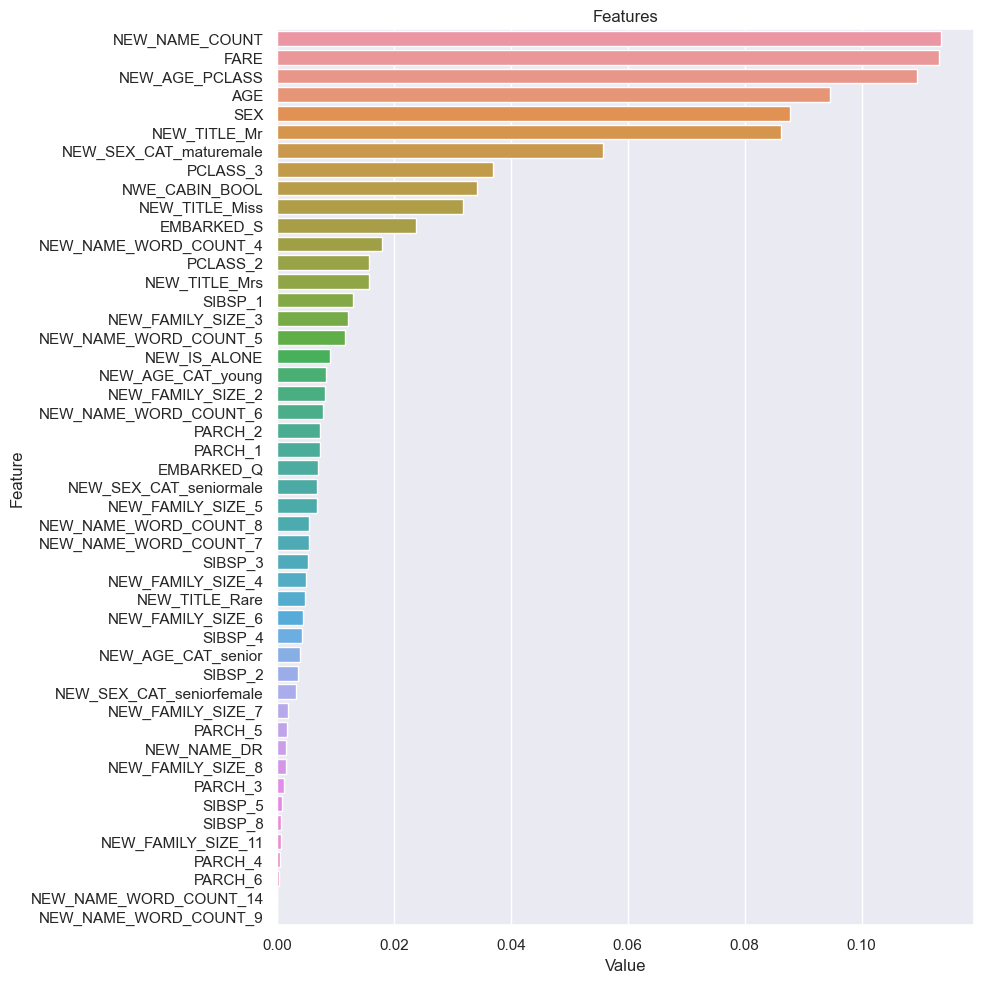

In [76]:
def plot_importance(model, features, num=len(X), save=False):
    feature_imp = pd.DataFrame({"Value": model.feature_importances_ , "Feature": features.columns})
    plt.figure(figsize=(10,10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                                    ascending= False)[0:num])
    
    plt.title("Features")
    plt.tight_layout()
    plt.show()
    if save:
        plt.savefig("importances.png")
        
        
plot_importance(rf_model, X_train)
#konum dışı olduğu için kod detayına girmedim.

burada değişkenlerimin önem sırasını görebiliyorum. ilginç bir şekilde NEW_NAME_COUNT değişkenim en önemli değişken olarak çıktı, fare değişkeni ikinci en önemli değişken yani bilet fiyatı, yine oluşturduğum yeni değişken newagepclass değişkeni en üst sıralarda, new_title_mr yine üst sıralarda,

peki çöpler hangileri new_name_word_count dan oluşturduğum dummies featurelar anlamsız olmuş. 

özellik mühendisliği ve veri ön işleme çok önemlidir ve machine learning algoritmaları bunlara dayanmaktadır.